# LOGISTIC REGRESSION FOR BREAST CANCER

## CLASSIFICATION IN SUPERVISED LEARNING

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

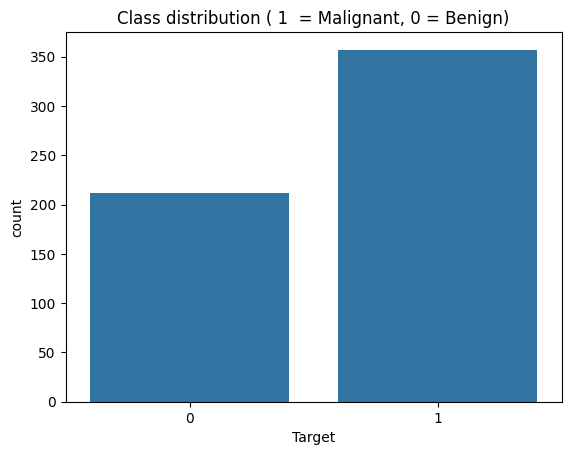

In [4]:
sns.countplot(x='Target', data = df)
plt.title('Class distribution ( 1  = Malignant, 0 = Benign)')
plt.show()

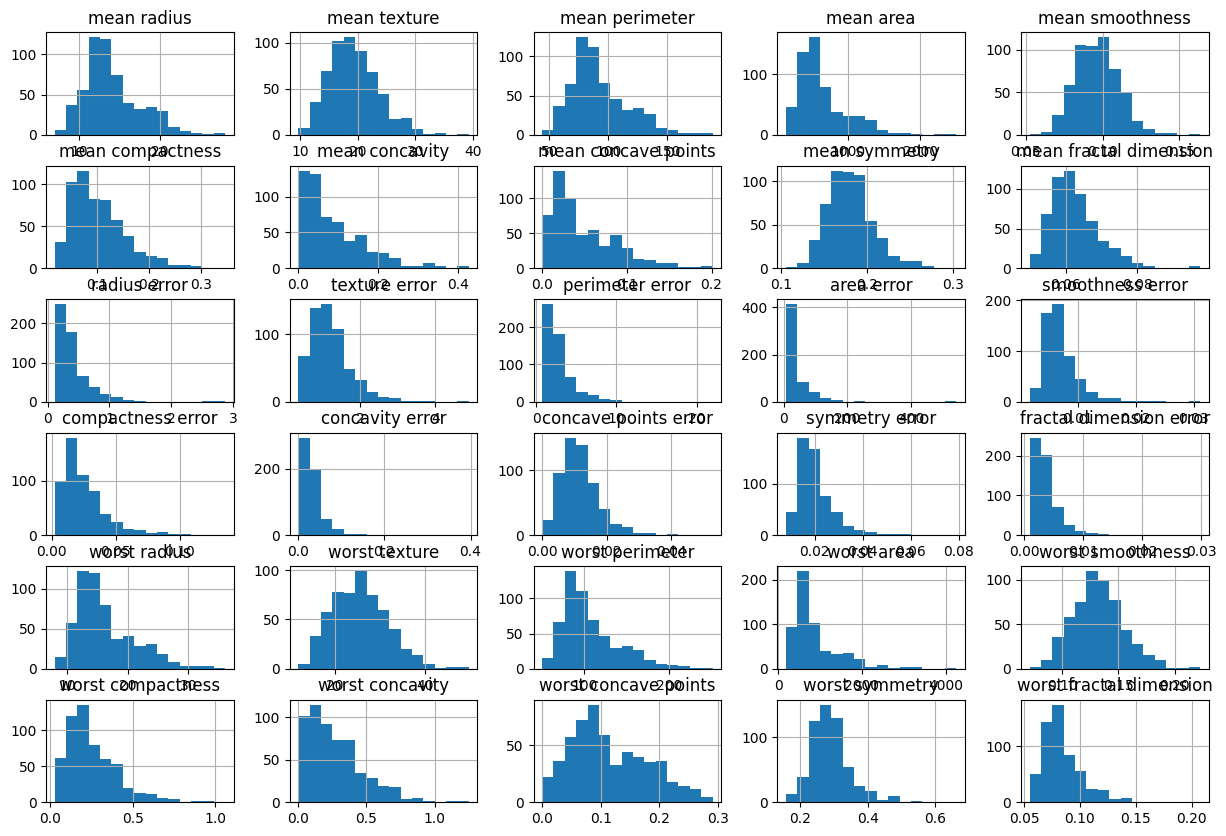

In [5]:
df[data.feature_names].hist(bins = 15, figsize = (15,10))
plt.show()

In [6]:
X = df[data.feature_names]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = df['Target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Target, Length: 569, dtype: int32

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [9]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
y_pred = model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
acc

0.956140350877193

In [11]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
del classification_report

In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[39  4]
 [ 1 70]]


## PARAMETER FINE TUNNING USING GRID SEARCH LOGISTIC REGRESSION

In [14]:
log_reg = model 

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] # Regularization strength
             , 'penalty': ['l2'], # L 2 regularization
             'solver' : ['lbfgs'],
             'class_weight': [None, 'balanced']} # handle imbalance
# Regularization strength


In [16]:
grid_search = GridSearchCV(estimator = log_reg, 
                          param_grid = param_grid, 
                          cv = 5 , 
                          scoring = 'recall')

In [17]:
grid_search.fit(X_train, y_train)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='recall')

In [18]:
best_model =  grid_search.best_estimator_

In [19]:
print("Best hyperparameters:" , grid_search.best_params_)

Best hyperparameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}


In [20]:
y_probs = best_model.predict_proba(X_test)[:, 1]
y_probs

array([8.64120558e-01, 1.94209297e-09, 1.20671965e-04, 9.99938111e-01,
       9.99996430e-01, 1.03589079e-12, 7.74254961e-14, 5.26941041e-03,
       9.67240131e-01, 9.99566133e-01, 9.59999599e-01, 2.25958155e-04,
       9.97949881e-01, 2.89974607e-02, 9.99633180e-01, 3.20399780e-04,
       9.99725541e-01, 9.99999836e-01, 9.99999894e-01, 1.13387662e-09,
       9.61416761e-01, 9.98905641e-01, 2.03673837e-12, 9.99957513e-01,
       9.99515148e-01, 9.99925775e-01, 9.99851126e-01, 9.99775574e-01,
       9.99016391e-01, 8.94606434e-10, 9.99480150e-01, 9.99965721e-01,
       9.99123499e-01, 9.96912126e-01, 9.99972168e-01, 9.99125309e-01,
       1.68819305e-03, 9.99340535e-01, 8.37663623e-07, 8.47098220e-01,
       9.99977449e-01, 4.27167682e-05, 9.99603390e-01, 9.99152854e-01,
       9.99925040e-01, 9.70239751e-01, 9.99971598e-01, 9.99968680e-01,
       9.63242054e-01, 9.99886127e-01, 3.32421883e-06, 2.04906482e-11,
       8.97293520e-01, 9.99977853e-01, 9.99895337e-01, 9.95060959e-01,
      

In [21]:
# Loop through thresholds to find the one with 0 Type 1 errors

In [22]:
import numpy as np

In [23]:
for t in np.arange(0.5, 0.8, 0.05):
    y_pred_custom = (y_probs >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_custom)
    false_positive = cm[0][1]
    false_negative = cm[1][0]
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Type I Errors (False Positives):", false_positive)
    print("Type II Errors (False Negatives):", false_negative)
    if false_positive == 0:
        print("Found threshold with 0 Type I errors!")
        break


Threshold: 0.50
Confusion Matrix:
[[39  4]
 [ 1 70]]
Type I Errors (False Positives): 4
Type II Errors (False Negatives): 1

Threshold: 0.55
Confusion Matrix:
[[41  2]
 [ 1 70]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 1

Threshold: 0.60
Confusion Matrix:
[[41  2]
 [ 1 70]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 1

Threshold: 0.65
Confusion Matrix:
[[41  2]
 [ 1 70]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 1

Threshold: 0.70
Confusion Matrix:
[[42  1]
 [ 1 70]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 1

Threshold: 0.75
Confusion Matrix:
[[42  1]
 [ 1 70]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 1

Threshold: 0.80
Confusion Matrix:
[[42  1]
 [ 1 70]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 1


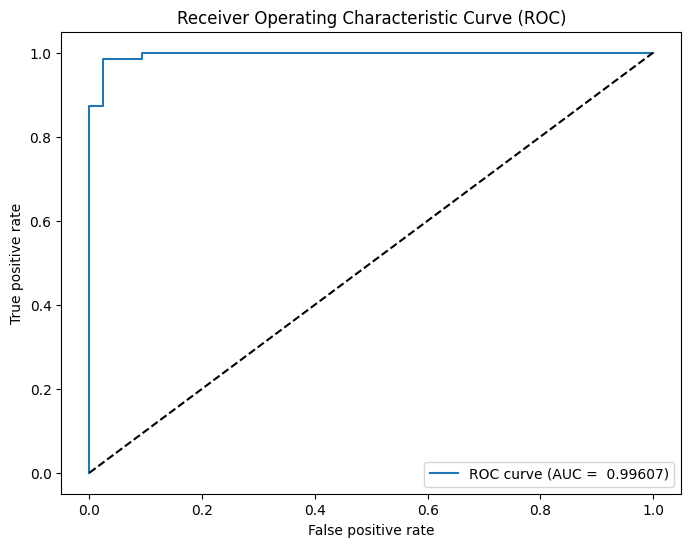

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc : .5f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend()
plt.show()

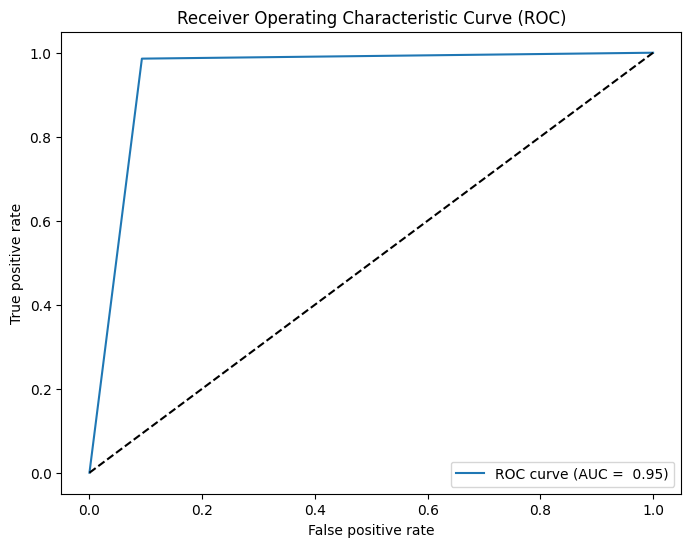

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc : .2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend()
plt.show()